# A Bayesian model for a coin toss

**Goal:** In this notebook you will learn how you can calculate the postirior distribution for the parameter $\theta$ as well as the predictvie distribution for the outcome of a bernoulli experiment. You will use the brute force approach and pick different prior distributions for the parameter $\theta$.
Note that you will use discrete values for the prior and postirior of $\theta$ here. You will work with sums in this notebook to approximate the integrals.

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. You 

**Dataset:** You work with the observed values of coin tosses, 1 for head and 0 for tail

**Content:**
* Define a uniform prior for $\theta$
* Evaluate the joined likelihood and the unnormalized posterior at one specific $\theta$
* Calculate the joined likelihood, the unnormalized posterior and the normalized posterior for a range of  $\theta$
* Calculate and plot the prior predictive distribution and the posterior predictive distribution

| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_07/nb_ch07_03.ipynb)




In [1]:
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
    %tensorflow_version 2.x
except:
    IN_COLAB = False

In [2]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0  running in colab?:  False


In [3]:
if IN_COLAB:
    !pip install tensorflow_probability==0.8.0

#### Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

plt.style.use('default') 
%matplotlib inline
tfd = tfp.distributions
print("TFP Version", tfp.__version__)
print("TF  Version",tf.__version__)

TFP Version 0.8.0
TF  Version 2.0.0


#### Create train data
In the next cell we set the outcome of three coin tosses to one, meaning we get three times head.

In [5]:
obs_data=np.repeat(1,3)


## Maximum likelihood approach to fit the Bernoulli model
Because we have a binary outcome (heads or tails) we need a Bernoulli model to describe the data. A Bernoulli model has only one parameter $\theta$ which is the probability to get outcome one (head). In the cell below you use the maximum liklihood approach to estimate the parameter $\theta$ and the standart deviation.

In [6]:
### ML
est_theta_ml=np.mean(obs_data)
print("ML theta",est_theta_ml)
sd_est_theta_ml = est_theta_ml * (1. - est_theta_ml)
print("sd theta",sd_est_theta_ml)

ML theta 1.0
sd theta 0.0


## Bayes approach to fit the Bernoulli model
For the Bayes approach we fist need to define a prior distribution for the patameter $\theta$ of the Bernoulli distribution. We evaluate the distributions at discrete points in the range 0.05 to 0.95. You use a uniform prior where every theta has the same probability. 

In [7]:
theta=np.arange(0.05,1,0.05)
print(theta)
prior = 1/len(theta) #The normalizing constant of the prior

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]


Let's evaluate the joined likelihood and the unnormalized posterior at one specific $\theta = 0.5$

In [8]:
dist = tfp.distributions.Bernoulli(probs=0.5) #one specific theta
print(np.prod(dist.prob(obs_data))) #joint likelihood
print(np.prod(dist.prob(obs_data))*prior) #unnormalized posterior

0.125
0.006578947368421052


Repeating the steps above for all thetas from the range of 0.05 until 0.95.

In [9]:
res = np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  res[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))

Note that we need to normalize the posterior, so that it sums up to one.

In [10]:
import pandas as pd
res=pd.DataFrame(res,columns=["theta","jointlik","prior","unnorm_post","post"])
res["post"]=res["unnorm_post"]/np.sum(res["unnorm_post"])
res

,theta,jointlik,prior,unnorm_post,post
0,0.05,0.000125,0.052632,0.000007,0.000028
1,0.10,0.001000,0.052632,0.000053,0.000222
2,0.15,0.003375,0.052632,0.000178,0.000748
3,0.20,0.008000,0.052632,0.000421,0.001773
4,0.25,0.015625,0.052632,0.000822,0.003463
5,0.30,0.027000,0.052632,0.001421,0.005983
6,0.35,0.042875,0.052632,0.002257,0.009501
7,0.40,0.064000,0.052632,0.003368,0.014183
8,0.45,0.091125,0.052632,0.004796,0.020194
9,0.50,0.125000,0.052632,0.006579,0.027701


### Posterior and prior for $\theta$

Let's plot the prior and the posterior for $\theta$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


Text(0.5, 1.0, 'posterior distribution')

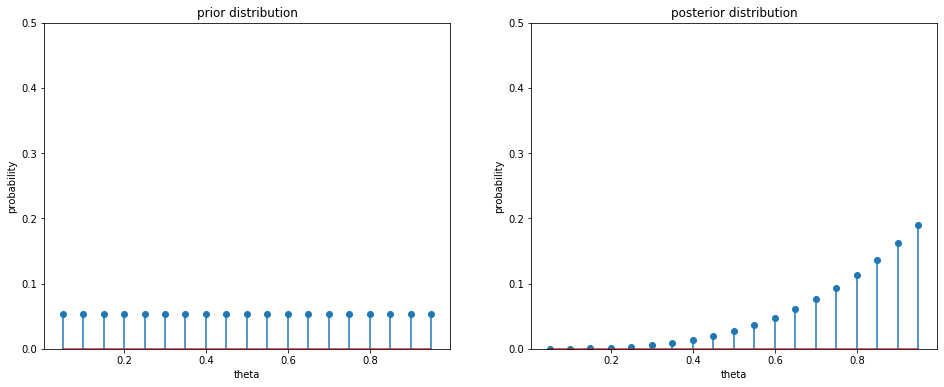

In [11]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(res["theta"],res["prior"])
plt.xlabel("theta")
plt.ylabel("probability")
plt.ylim([0,0.5])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem(res["theta"],res["post"])
plt.ylim([0,0.5])
plt.xlabel("theta")
plt.ylabel("probability")
plt.title("posterior distribution")

### Posterior and prior for head

The predictive distribution is given by

$
p(y|D)=\sum_i p(y|\theta_i)p(\theta_i|D)
$

For the probability of head, we have $\theta_i = p(y=1|\theta_i)$. For $p(\theta_i|D)$, we first use the posterior distribution resulting in

$
  p(y=1|D) = \sum_i \theta_i p(\theta_i|D)
$

In [12]:
py1_post = np.sum((res["theta"])*res["post"])
py0_post = 1.0 - py1_post
py0_post, py1_post

(0.22068421371448932, 0.7793157862855107)

Similar, you get for the prior distributions: 

In [13]:
py1_prior = np.sum((res["theta"])*res["prior"]) 
py0_prior = 1 - py1_prior
py0_prior, py1_prior

(0.5, 0.5)

We plot this togther with the figure above.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individu

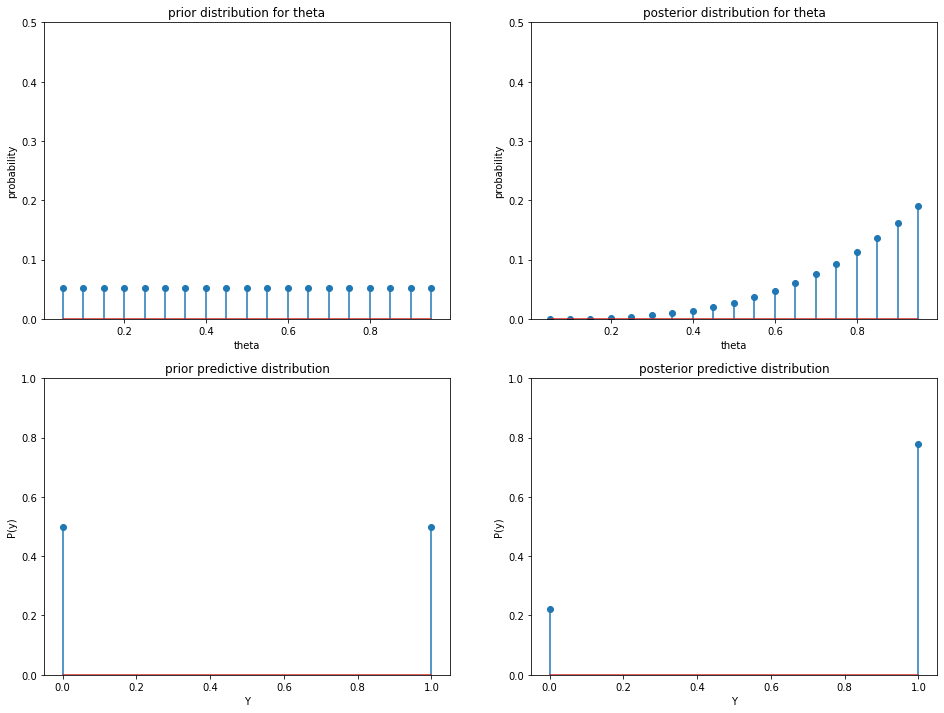

In [14]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.stem(res["theta"],res["prior"])
plt.xlabel("theta")
plt.ylabel("probability")
plt.ylim([0,0.5])
plt.title("prior distribution for theta")
plt.subplot(2,2,2)
plt.stem(res["theta"],res["post"])
plt.ylim([0,0.5])
plt.xlabel("theta")
plt.ylabel("probability")
plt.title("posterior distribution for theta")
plt.savefig("test.pdf")

plt.subplot(2,2,3)
plt.stem([0,1],[py0_prior,py1_prior])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("prior predictive distribution")
plt.subplot(2,2,4)
plt.stem([0,1],[py0_post,py1_post])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior predictive distribution")


#plt.show()
plt.savefig("ch07_b2a.pdf")
# from google.colab import files
# files.download('ch07_b2a') 
plt.show()

### Posterior and the predictive distribution for different observed data

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

*Exercise 1: Let's assume fist you observed 40 times head and then you observed 11 times head and 9 times tail. How does the posterior and the predictive distribution look, for these two cases?*

In [15]:
# Write your code here

Scroll down to see the solution.

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

In [16]:
obs_data=np.repeat(1,40)
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


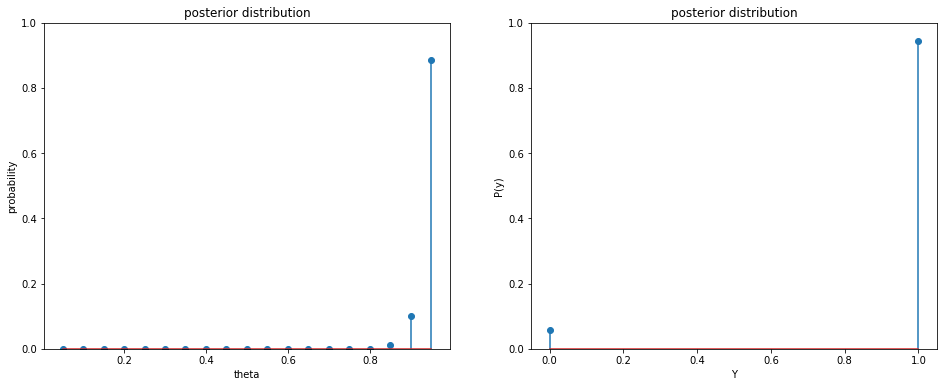

In [17]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("probability")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [18]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.0562881296408708, 0.9437118703591292]

In [19]:
obs_data=np.concatenate((np.repeat(1,11),np.repeat(0,9)))
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


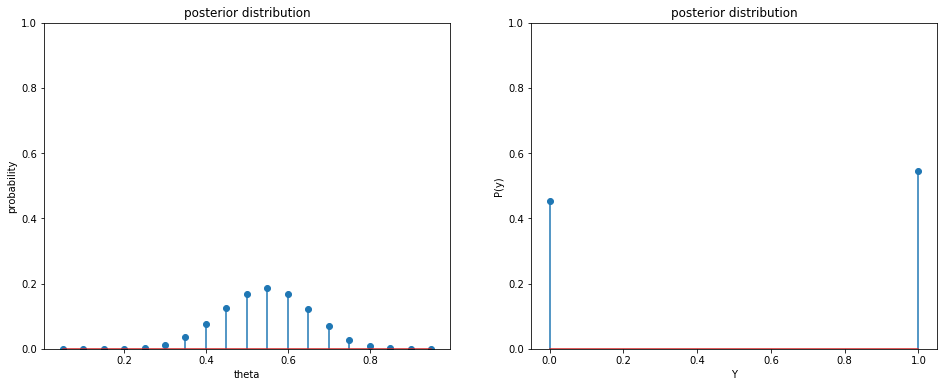

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("probability")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [21]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.45454546278196234, 0.5454545372180377]

### Different prior

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

*Exercise 2: Let's now repeat the experiment with a non-uniform distributed prior. You will use a halfcircle as prior. With this prior calculate again the posterior when you fist observe 40 times head and then you observed 11 times head and 9 times tail. How does the posterior and the predictive distribution look with the new prior?*

In [22]:
prior=np.sqrt(np.square(0.5)-np.square(theta-0.5))-0.2
prior=prior/np.sum(prior)#normalzation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


(0, 1)

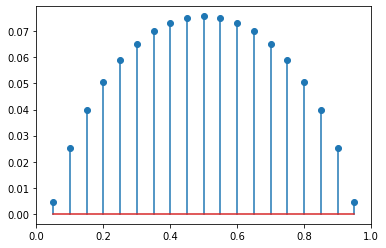

In [23]:
plt.stem(theta,prior)
plt.xlim([0,1])

Scroll down to see the solution.

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

In [24]:
obs_data=np.repeat(1,40)
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior[i],np.prod(dist.prob(obs_data))*prior[i]))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  
RES

,theta,jointlik,prior,unnorm_post,post
0,0.05,0.000000e+00,0.004530,0.000000e+00,0.000000e+00
1,0.10,9.999946e-41,0.025244,2.524413e-42,2.469553e-39
2,0.15,1.105735e-33,0.039652,4.384408e-35,4.289127e-32
3,0.20,1.099509e-28,0.050489,5.551260e-30,5.430620e-27
4,0.25,8.271806e-25,0.058822,4.865670e-26,4.759930e-23
5,0.30,1.215769e-21,0.065195,7.926231e-23,7.753978e-20
6,0.35,5.790592e-19,0.069919,4.048721e-20,3.960734e-17
7,0.40,1.208927e-16,0.073183,8.847244e-18,8.654976e-15
8,0.45,1.344312e-14,0.075100,1.009580e-15,9.876396e-13
9,0.50,9.094947e-13,0.075733,6.887857e-14,6.738171e-11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


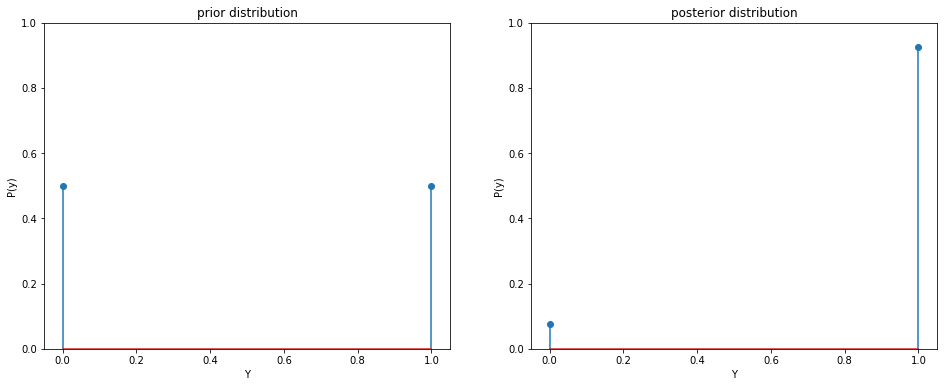

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["prior"]),np.sum((RES["theta"])*RES["prior"])])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


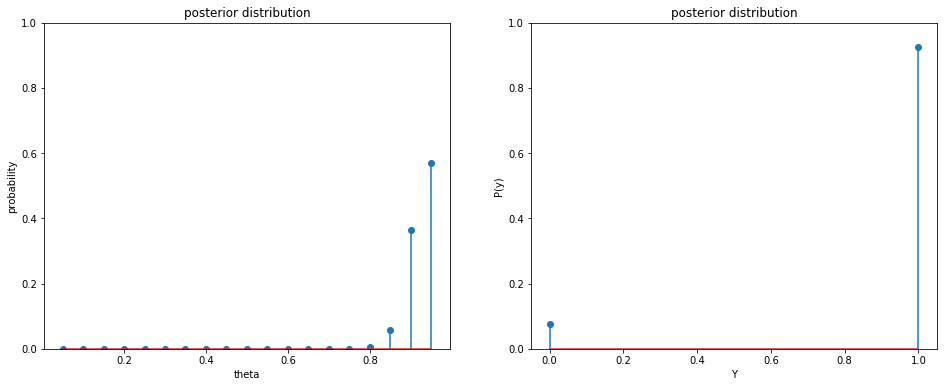

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("probability")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [27]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.07518995042189493, 0.9248100495781051]

In [28]:
obs_data=np.concatenate((np.repeat(1,11),np.repeat(0,9)))
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior[i],np.prod(dist.prob(obs_data))*prior[i]))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  
RES

,theta,jointlik,prior,unnorm_post,post
0,0.05,3.077387e-15,0.004530,1.394078e-17,3.397534e-11
1,0.10,3.874201e-12,0.025244,9.780136e-14,2.383536e-07
2,0.15,2.003431e-10,0.039652,7.943911e-12,1.936026e-05
3,0.20,2.748777e-09,0.050489,1.387817e-10,3.382275e-04
4,0.25,1.790158e-08,0.058822,1.053013e-09,2.566319e-03
5,0.30,7.148524e-08,0.065195,4.660496e-09,1.135819e-02
6,0.35,1.999719e-07,0.069919,1.398182e-08,3.407536e-02
7,0.40,4.226892e-07,0.073183,3.093350e-08,7.538863e-02
8,0.45,7.056702e-07,0.075100,5.299591e-08,1.291573e-01
9,0.50,9.536743e-07,0.075733,7.222442e-08,1.760195e-01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


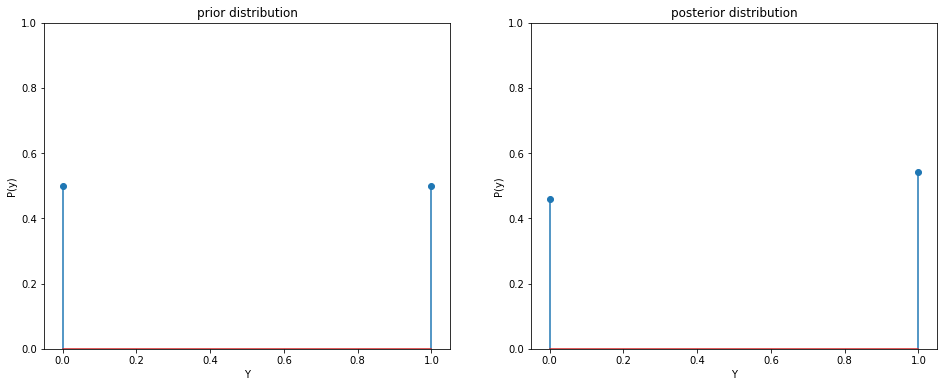

In [29]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["prior"]),np.sum((RES["theta"])*RES["prior"])])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


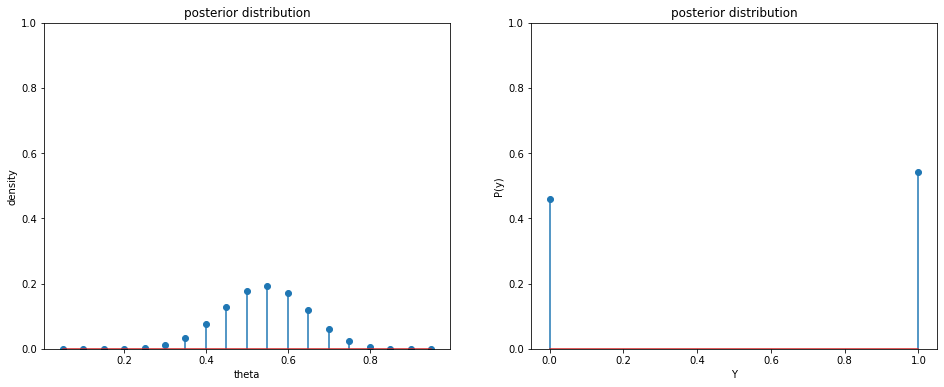

In [30]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [31]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.4579006177929155, 0.5420993822070844]